# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


# 1. Data Cleaning, Transformation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [4]:
duplicates = df.duplicated().sum()
print("Duplicates:", duplicates)

Duplicates: 0


In [6]:
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,0,7,3,2022-11-17,7167,7960,3,37490.983364,146,0,2022-12-01,0,1
1,Ruben Burns,35,1,6,1,2023-06-01,2597,978,4,47304.064845,404,1,2023-06-15,2,2
2,Chad Byrd,61,1,5,5,2019-01-09,7180,7996,3,36874.896997,292,1,2019-02-08,2,2
3,Antonio Frederick,49,1,5,1,2020-05-02,1169,2482,3,23303.322092,480,2,2020-05-03,4,0
4,Mrs. Brandy Flowers,51,1,7,0,2021-07-09,2775,3908,4,18086.344184,477,2,2021-08-02,3,2


# 2. Visualization (EDA)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,51.452200,19.588974,18.000000,35.000000,52.000000,68.000000,85.000000
Gender,10000.0,0.492500,0.499969,0.000000,0.000000,0.000000,1.000000,1.000000
Blood Type,10000.0,3.501100,2.286071,0.000000,2.000000,3.000000,5.000000,7.000000
Medical Condition,10000.0,2.487500,1.701803,0.000000,1.000000,2.000000,4.000000,5.000000
Doctor,10000.0,4712.651000,2713.556877,0.000000,2354.750000,4702.500000,7048.250000,9415.000000
Hospital,10000.0,4349.432600,2500.066462,0.000000,2195.750000,4341.500000,6518.250000,8638.000000
Insurance Provider,10000.0,1.979900,1.413045,0.000000,1.000000,2.000000,3.000000,4.000000
Billing Amount,10000.0,25516.806778,14067.292709,1000.180837,13506.523967,25258.112566,37733.913727,49995.902283
Room Number,10000.0,300.082000,115.806027,101.000000,199.000000,299.000000,400.000000,500.000000
Admission Type,10000.0,1.014900,0.814337,0.000000,0.000000,1.000000,2.000000,2.000000


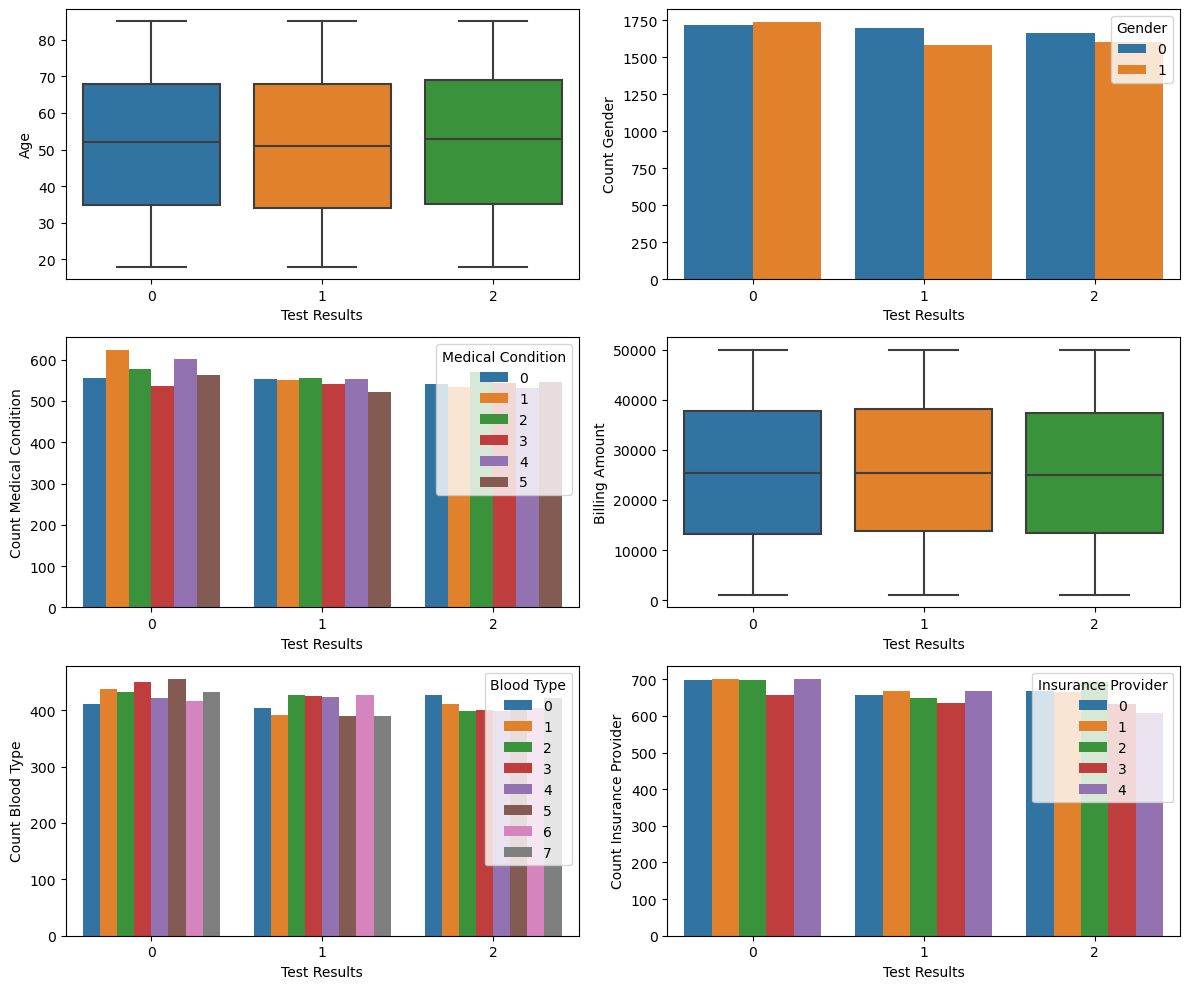

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

sns.boxplot(x='Test Results', y='Age', data=df, ax=axes[0, 0])
axes[0, 0].set_xlabel("Test Results")
axes[0, 0].set_ylabel("Age")

# Count plot for Gender
sns.countplot(x='Test Results', hue='Gender', data=df, ax=axes[0, 1])
axes[0, 1].set_xlabel("Test Results")
axes[0, 1].set_ylabel("Count Gender")

# Count plot for Medical Condition
sns.countplot(x='Test Results', hue='Medical Condition', data=df, ax=axes[1, 0])
axes[1, 0].set_xlabel("Test Results")
axes[1, 0].set_ylabel("Count Medical Condition")

sns.boxplot(x='Test Results', y='Billing Amount', data=df, ax=axes[1, 1])
axes[1, 1].set_xlabel("Test Results")
axes[1, 1].set_ylabel("Billing Amount")

sns.countplot(x='Test Results', hue='Blood Type', data=df, ax=axes[2, 0])
axes[2, 0].set_xlabel("Test Results")
axes[2, 0].set_ylabel("Count Blood Type")

sns.countplot(x='Test Results', hue='Insurance Provider', data=df, ax=axes[2, 1])
axes[2, 1].set_xlabel("Test Results")
axes[2, 1].set_ylabel("Count Insurance Provider")


plt.tight_layout()
plt.show()

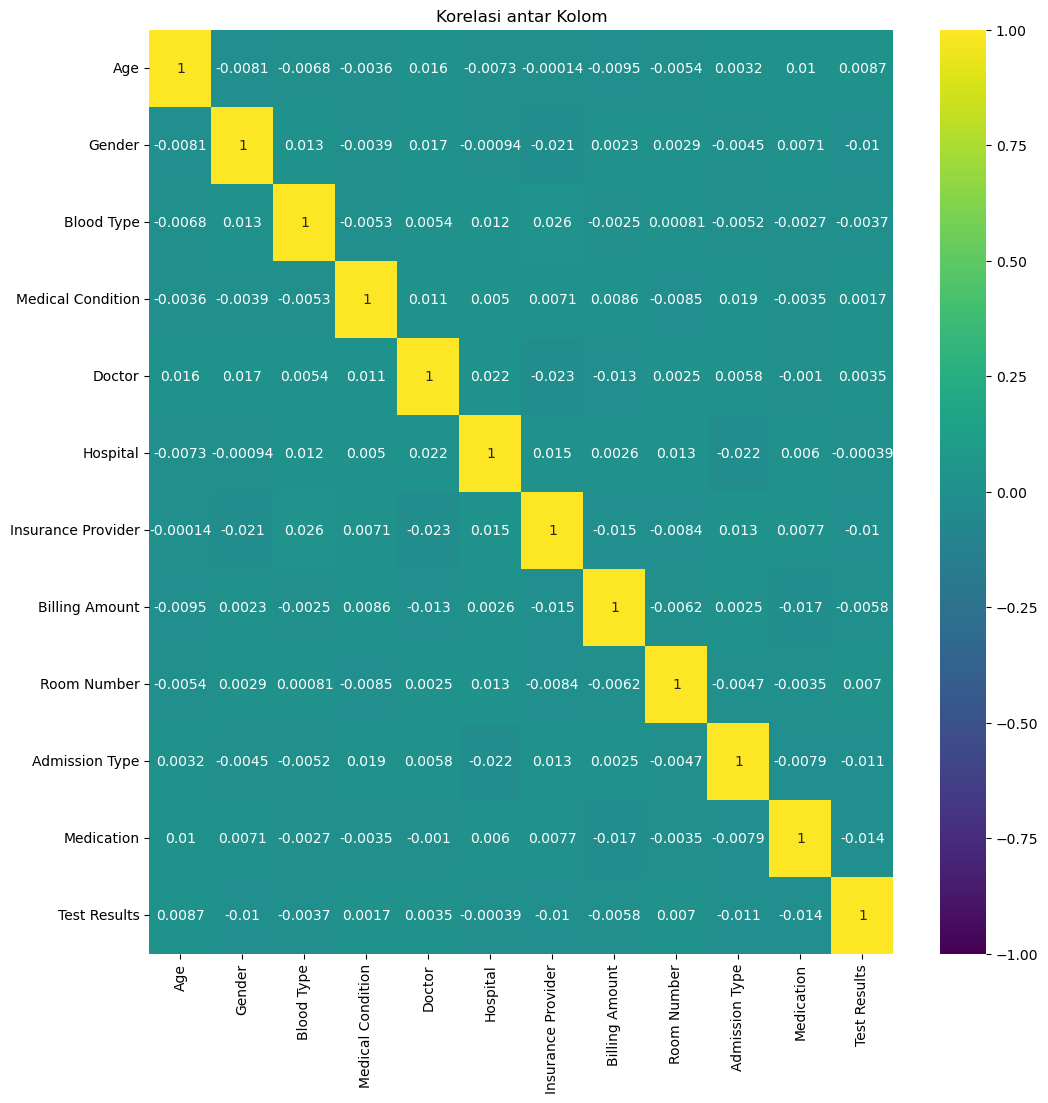

In [19]:
plt.figure(figsize = (12,12))
sns.heatmap(data=df.corr(), vmin=-1, vmax=1, cmap="viridis", annot=True)
plt.title('Korelasi antar Kolom')
plt.show()

# 3. Regression

### 4. Linear Regression

In [8]:
X = df.drop(["Test Results","Name", "Doctor", "Hospital", "Date of Admission", "Discharge Date"], axis=1)
y = df['Test Results']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(f"Intercept / Constant Value : {regressor.intercept_ :.4f}")
print(f"Coefficient x1 : {regressor.coef_[0] :.4f}")
print(f"Coefficient x2 : {regressor.coef_[1] :.4f}")
print(f"Coefficient x3 : {regressor.coef_[2] :.4f}")
print(f"Coefficient x4 : {regressor.coef_[3] :.4f}")
print(f"Coefficient x5 : {regressor.coef_[4] :.4f}")

Intercept / Constant Value : 1.0053
Coefficient x1 : 0.0005
Coefficient x2 : -0.0192
Coefficient x3 : -0.0016
Coefficient x4 : 0.0017
Coefficient x5 : -0.0049


In [15]:
x = sm.add_constant(X_train)
model = sm.OLS(y_train, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Test Results   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7412
Date:                Thu, 30 Nov 2023   Prob (F-statistic):              0.671
Time:                        15:48:28   Log-Likelihood:                -10979.
No. Observations:                9000   AIC:                         2.198e+04
Df Residuals:                    8990   BIC:                         2.205e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0053      0

In [18]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root mean square error (RMSE) :', rmse)

Root mean square error (RMSE) : 0.8193641553656842


In [20]:
# Menghitung Coefficient of Determination (R-squared)
r_squared = regressor.score(X_test, y_test)

print('Coefficient of determination (R-squared):', r_squared) 

Coefficient of determination (R-squared): -0.0007850249885903438


# 3. Classification

In [27]:
X = df.drop(["Test Results","Name", "Doctor", "Hospital", "Date of Admission", "Discharge Date"], axis=1)
y = df['Test Results']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

### 4. KNN

In [31]:
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [32]:
y_pred = knn.predict(X_test)
print(y_pred)

[0 0 2 2 2 0 1 0 0 1 1 2 1 1 1 1 0 0 0 0 1 0 1 2 0 0 0 0 0 2 0 0 1 0 0 0 2
 1 1 0 2 0 1 2 2 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 2 1 2 0 0 0 0 0 0 0 1 1 2
 0 1 0 0 1 1 0 1 0 0 0 1 1 2 0 1 2 1 2 0 0 0 2 0 0 1 0 1 0 0 0 1 1 2 0 0 1
 0 1 0 0 1 1 0 1 0 0 1 2 0 1 2 1 1 2 0 1 0 1 0 1 1 0 1 0 0 1 2 1 0 2 2 0 1
 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 2 1 0 0 1 0 0 0 2 1 0 0 0 0 1 0 0 2 0 2 1 0
 0 0 0 0 0 1 0 1 2 0 1 1 1 2 1 0 0 0 1 1 1 0 1 0 2 0 1 0 0 0 1 0 1 0 1 1 1
 2 1 2 1 2 0 1 0 0 2 1 0 1 1 1 2 0 1 0 0 2 1 2 1 0 0 0 1 0 2 1 2 0 0 0 2 1
 0 1 0 0 1 0 0 0 0 0 0 1 0 2 0 2 0 0 2 1 2 2 2 0 1 1 0 0 1 2 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 1 1 0 0 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 2 2
 1 0 0 0 1 2 0 1 1 0 0 0 1 1 1 2 2 0 0 1 1 2 0 0 1 0 0 0 0 2 0 0 1 1 2 0 0
 1 0 2 0 2 1 0 1 2 1 1 0 0 2 0 0 0 1 2 0 0 2 1 0 0 0 2 1 0 0 1 0 2 0 0 2 1
 1 1 0 0 2 2 0 2 2 0 1 1 1 0 1 0 0 1 0 2 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0
 2 0 0 1 2 1 0 2 2 0 0 1 0 1 2 2 0 0 0 0 0 0 1 2 1 0 0 0 0 0 0 0 0 0 2 1 0
 0 1 1 0 0 0 0 2 0 1 0 0 

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[164 112  66]
 [184  89  56]
 [150 121  58]]
Accuracy Score :  0.311


### 4.Logistic Regression

In [35]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [36]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[342   0   0]
 [329   0   0]
 [329   0   0]]
Accuracy Score :  0.342


### 4. Naive Baiyes

In [38]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [39]:
y_pred = naive_bayes.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 2 0 2 0 0 0 0 2 2 0 0 2 0 0 2 0 1 0 2 0 2 0 0 0 0 0 0 1 2 2 2 0 0 0
 2 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 2 0 2 0 0 0 2 2 0 0 0
 2 0 0 1 1 0 1 0 0 0 0 2 0 0 0 0 2 0 0 1 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0
 1 0 2 2 0 2 0 0 0 1 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 1 2 0 0 0 0 0 2 1 0 0 0 0 2
 2 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 1 0 0 1 0 2 0 0 0 0 0 0 0 2 0 0 2 0 1
 0 0 0 0 2 0 0 2 0 0 0 0 2 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 0 1 0 2 0 2 0 0 2 0 0 0 0 2 0 0 2 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 2 0 0 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 1 2 0 0 0 0 0 0 2 0 1 0 0 2 2 0 0
 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 1 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 1 0 0 0 0 2 2 2 2 2 0 0 0 2 0 2 0 0 0 0 2 0 0 2 0 2 2 2 0 0
 2 0 0 2 0 2 0 0 0 0 0 0 

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[256  25  61]
 [256  25  48]
 [254  11  64]]
Accuracy Score :  0.345


Naive Bayes memiliki skor akurasi tertinggi di antara ketiga model (0.345). Regresi Logistik (0.342), dan kemudian K-Nearest Neighbors (0.311).

K-Nearest Neighbors tampaknya memiliki matriks kebingungan yang lebih seimbang dibandingkan dengan Regresi Logistik, yang memprediksi semua instance sebagai Kelas 1.

Naive Bayes menunjukkan distribusi true positives dan false positives yang beragam di seluruh kelas.